![](http://thecads.org/wp-content/uploads/2017/02/adax_logo.jpg)
# Module 4: Data Manipulation and Analysis with Pandas

![](http://pandas.pydata.org/_static/pandas_logo.png)
[Pandas](http://pandas.pydata.org/) is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. Pandas is free software released under the three-clause BSD license. The name is derived from the term _panel data_, an econometrics term for multidimensional structured data sets.

#### Contents

* [Series](#Series)
* [DataFrames](#DataFrames)
* [Importing Pandas](#Importing-Pandas) and other libraries.
* [Creating Data](#Creating-Data) using lists and tuples
* [Viewing Data](#Viewing-Data)
* [Saving Data](#Saving-Data) to_csv and to_excel
* [Loading Data](#Loading-Data) read_csv, read_table read_excel, read_html
    * [Unix and os](#Unix-and-os)
    * [CSVs and Excel](#CSVs-and-Excel)
* [Selecting Data](#Selecting-Data) loc,iloc,isin
    * [Masks](#Masks) or boolean arrays
* [Preparing Data](#Preparing-Data)
    * [Missing Values](#Missing-Values)
    
*[to be continued in part 4b]*

NB: This notebook misses some methods of joining and concatenating and merging data. The instances in which those are useful are quite specific, so we'll see some examples but won't have a section in this notebook for reference. 

#### Resources:  
* [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/index.html), especially
[10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)  
* [The Data Incubator](https://www.thedataincubator.com/)  
* [Hernan Rojas' learn-pandas](https://bitbucket.org/hrojas/learn-pandas)  
* [Harvard CS109 lab1 content](https://github.com/cs109/2015lab1)

## Series

In [2]:
#import pandas library as pd
import pandas as pd
#import matplotlib library as plt 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#create a pandas series from list
#observe the dtype
animals = ['Tiger', 'Bear', 'Moose']
pd.Series(animals)

0    Tiger
1     Bear
2    Moose
dtype: object

In [4]:
#create a pandas series from list
#observe the dtype
numbers = [1, 2, 3]
pd.Series(numbers)

0    1
1    2
2    3
dtype: int64

In [5]:
#it is possible to create a pandas series with None, indicating no data
#observe the dtype
animals = ['Tiger', 'Bear', None]
pd.Series(animals)

0    Tiger
1     Bear
2     None
dtype: object

In [6]:
#in the case of numbers, None will give a NaN (Not a Number)
#observe the dtype
numbers = [1, 2, None]
pd.Series(numbers)

0    1.0
1    2.0
2    NaN
dtype: float64

In [7]:
#create a pandas series from dictionary
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'} #already defined the keys 
                                      #as archery,golf,sumo,taekwando
s = pd.Series(sports)
s

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [8]:
#what's the type for s?
type(s)

pandas.core.series.Series

In [9]:
s.dtypes


dtype('O')

In [10]:
s.unique # dpt index & values skali
s.unique() # dpt values je

array(['Bhutan', 'Scotland', 'Japan', 'South Korea'], dtype=object)

In [11]:
#notice the index for s
s.index # output list of all index

Index(['Archery', 'Golf', 'Sumo', 'Taekwondo'], dtype='object')

In [12]:
#you can also create a series from list and index
sr = pd.Series(['Tiger', 'Bear', 'Moose'], index=['India', 'America', 'Canada'])
sr

India      Tiger
America     Bear
Canada     Moose
dtype: object

In [13]:
#a list can be created based on the specified indices
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
sp1 = pd.Series(sports, index=['Golf', 'Sumo', 'Hockey'])
sp1

Golf      Scotland
Sumo         Japan
Hockey         NaN
dtype: object

## Querying a series

In [14]:
sports = {'Archery': 'Bhutan',
          'Golf': 'Scotland',
          'Sumo': 'Japan',
          'Taekwondo': 'South Korea'}
s = pd.Series(sports)
s

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
dtype: object

In [15]:
#iloc to query based on index
s.iloc[3]

'South Korea'

In [16]:
#loc to query based on location
s.loc['Golf']

'Scotland'

In [17]:
#to query based on index
s[3] and s.loc['Taekwondo']

'South Korea'

In [18]:
#to query based on location
s['Golf']

'Scotland'

In [19]:
sports = {99: 'Bhutan',
          100: 'Scotland',
          101: 'Japan',
          102: 'South Korea'}
s = pd.Series(sports)
s

99          Bhutan
100       Scotland
101          Japan
102    South Korea
dtype: object

In [20]:
s[99] #This won't call s.iloc[0] as one might expect, it generates an error instead
s[101]
# try s[99] or s[101]. What can you make of this?

'Japan'

In [21]:
#create a pandas series from a dictionary and a list -- flexible!
original_sports = pd.Series({'Archery': 'Bhutan',
                             'Golf': 'Scotland',
                             'Sumo': 'Japan',
                             'Taekwondo': 'South Korea'})

cricket_loving_countries = pd.Series(['Australia',
                                      'Barbados',
                                      'Pakistan',
                                      'England'], 
                                index=['Cricket',
                                       'Cricket',
                                       'Cricket',
                                       'Cricket'])
all_countries = original_sports.append(cricket_loving_countries)

In [22]:
all_countries

Archery           Bhutan
Golf            Scotland
Sumo               Japan
Taekwondo    South Korea
Cricket        Australia
Cricket         Barbados
Cricket         Pakistan
Cricket          England
dtype: object

In [23]:
#using loc to list all countries with the index 'Cricket'
all_countries.loc['Cricket']

Cricket    Australia
Cricket     Barbados
Cricket     Pakistan
Cricket      England
dtype: object

## DataFrames


A data frame is like a table, with rows and columns (e.g., as in SQL or Excel).  
**Except** that :
  - The rows can be indexed by something interesting (there is special support for labels like categorical and timeseries data).
  - Cells can store any Python object. Like in SQL, columns must have a homogenous type.
  - Instead of "NULL", the name for a non-existent value is "NA".  Unlike R, Python's data frames only support NAs in columns of some data types (basically: floating point numbers and 'objects') -- but this is mostly a non-issue (because it will "up-type" integers to float64, etc.)
  
Each of a ```DataFrame```'s columns are an individual ```Series```, (more correctly, a dataframe is a dictionary of Series).  The entires series must have a homogenous type. 

In [24]:
# Example 1
# Let's make a dataset that consists of Malaysian States
# and the size of each state in km2.  Let's try and rank 
# the states of Malaysia by land area, and figure out if East
# Malaysia is larger or smaller than West Malaysia

states = ['Johor','Kedah','Kelantan','Melaka', 
          'Negeri Sembilan','Pahang','Perak','Perlis',
          'Penang','Sabah', 'Sarawak','Selangor','Terengganu']
area = [19210,9500,15099,1664,6686,36137,21035,
        821,1048,73631,124450,8104,13035]

In [25]:
# Use the zip function to merge the two lists together
zip?

In [26]:
# Area Data Set
state_area = list(zip(states, area))
state_area

[('Johor', 19210),
 ('Kedah', 9500),
 ('Kelantan', 15099),
 ('Melaka', 1664),
 ('Negeri Sembilan', 6686),
 ('Pahang', 36137),
 ('Perak', 21035),
 ('Perlis', 821),
 ('Penang', 1048),
 ('Sabah', 73631),
 ('Sarawak', 124450),
 ('Selangor', 8104),
 ('Terengganu', 13035)]

We now will use the ***pandas*** library to export this data set into a csv file. 

***df*** will be a ***DataFrame*** object. You can think of this object holding the contents of states in a format similar to a sql table or an excel spreadsheet. Let's take a look below at the contents inside ***df***.

In [27]:
df = pd.DataFrame(data = state_area, columns=['State','Area'])
#head to show first 5 rows of data
df.head()

,State,Area
0,Johor,19210
1,Kedah,9500
2,Kelantan,15099
3,Melaka,1664
4,Negeri Sembilan,6686


In [28]:
print((type(df)))
print() 
print((df.info()))

<class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
State    13 non-null object
Area     13 non-null int64
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes
None


In [29]:
#provide statistical summary for the whole dataset
df.describe()
#find out what these statistics are...

,Area
count,13.000000
mean,25416.923077
std,35627.125329
min,821.000000
25%,6686.000000
50%,13035.000000
75%,21035.000000
max,124450.000000


In [30]:
type(df['Area'])

pandas.core.series.Series

In [31]:
df['Area']

0      19210
1       9500
2      15099
3       1664
4       6686
5      36137
6      21035
7        821
8       1048
9      73631
10    124450
11      8104
12     13035
Name: Area, dtype: int64

In [32]:
# Ranking of land area -- top 5
# East Malaysia looks big!
df = df.sort_values('Area', ascending=False)
df.head(5)

,State,Area
10,Sarawak,124450
9,Sabah,73631
5,Pahang,36137
6,Perak,21035
0,Johor,19210


In [33]:
df.iloc[4,:]

State    Johor
Area     19210
Name: 0, dtype: object

In [34]:
# Excluding WPs, East Malaysia is larger than West Malaysia!
print(('East Malaysia Size: ', df['Area'][0:2].sum()))           # get only data from row 9 and 10 to be summed
print(('West Malaysia Size: ', df['Area'].sum() - df['Area'][0:2].sum()))

('East Malaysia Size: ', 198081)
('West Malaysia Size: ', 132339)


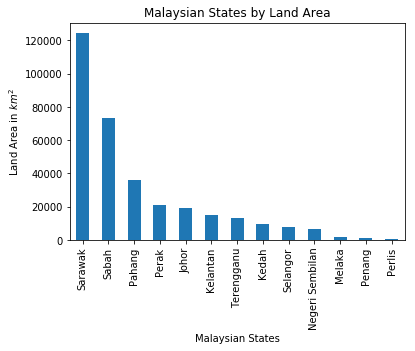

In [35]:
# Create graph
df['Area'].plot.bar()
plt.xticks(np.arange(13), (df['State']))
plt.xlabel('Malaysian States')
plt.ylabel('Land Area in $km^2$')
plt.title('Malaysian States by Land Area')
plt.show();

In [36]:
# before we proceed to the second example, let's store the DataFrame 'df' in another variable
stateDF = df

In [37]:
#Example 2
purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})
purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})
purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})
df = pd.DataFrame([purchase_1, purchase_2, purchase_3], index=['Store 1', 'Store 2', 'Store 3'])
df.head()

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 2,2.5,Kitty Litter,Kevyn
Store 3,5.0,Bird Seed,Vinod


In [38]:
df.loc['Store 2']

Cost                       2.5
Item Purchased    Kitty Litter
Name                     Kevyn
Name: Store 2, dtype: object

In [39]:
df.iloc[2:]

,Cost,Item Purchased,Name
Store 3,5.0,Bird Seed,Vinod


In [40]:
df.iloc(2)

In [41]:
type(df.loc['Store 2'])

pandas.core.series.Series

In [42]:
df.loc['Store 1']

Cost                  22.5
Item Purchased    Dog Food
Name                 Chris
Name: Store 1, dtype: object

In [43]:
df.loc['Store 1', 'Cost']

22.5

In [44]:
#transpose dataframe
df.T

,Store 1,Store 2,Store 3
Cost,22.5,2.5,5
Item Purchased,Dog Food,Kitty Litter,Bird Seed
Name,Chris,Kevyn,Vinod


In [45]:
df.T.loc['Cost']

Store 1    22.5
Store 2     2.5
Store 3       5
Name: Cost, dtype: object

In [46]:
df['Cost']

Store 1    22.5
Store 2     2.5
Store 3     5.0
Name: Cost, dtype: float64

In [47]:
df.loc['Store 1']['Cost']

22.5

In [48]:
df.loc[:,['Name', 'Cost']] #get every name & cost for every row

,Name,Cost
Store 1,Chris,22.5
Store 2,Kevyn,2.5
Store 3,Vinod,5.0


In [49]:
#to delete a row
df.drop('Store 1')

,Cost,Item Purchased,Name
Store 2,2.5,Kitty Litter,Kevyn
Store 3,5.0,Bird Seed,Vinod


In [50]:
#notice that drop does not change the original dataset
#drop created a copy instead
df

,Cost,Item Purchased,Name
Store 1,22.5,Dog Food,Chris
Store 2,2.5,Kitty Litter,Kevyn
Store 3,5.0,Bird Seed,Vinod


In [51]:
copy_df = df.copy()
copy_df = copy_df.drop('Store 1') #.drop does not change original dataset
copy_df

,Cost,Item Purchased,Name
Store 2,2.5,Kitty Litter,Kevyn
Store 3,5.0,Bird Seed,Vinod


In [52]:
#use del
#will change the original dataset
del copy_df['Name']
copy_df

,Cost,Item Purchased
Store 2,2.5,Kitty Litter
Store 3,5.0,Bird Seed


In [53]:
#create a new column 'Location' with None value
df['Location'] = None
df

,Cost,Item Purchased,Name,Location
Store 1,22.5,Dog Food,Chris,None
Store 2,2.5,Kitty Litter,Kevyn,None
Store 3,5.0,Bird Seed,Vinod,None


## Importing Pandas

The general way to import libraries is to write
```python
import library #import the library directly
import library as alias 

# This just aliases the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().

from library import function # import specific functions or types in a library
%jupyter magic # jupyter only functions
```

In [54]:
# Some imports - for style reasons, try and put in alphabetical order, unless there are subgroupings of imports
# that you want.
import matplotlib #we'll only use this to determine the matplotlib version number
import matplotlib.pyplot as plt  # the graphing library
import numpy as np # scientific computing library
import pandas as pd # the data structure and analysis library
from pandas import DataFrame, read_csv, Series # specific functions from pandas
import seaborn as sns # Makes graphs look pretty
import sys #we'll only use this to determine the python version number

# Enable inline plotting.  The % is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline


In [55]:
# All the imports are listed as modules, including pyplot.  But there are several other types
%whos

Variable                   Type         Data/Info
-------------------------------------------------
DataFrame                  type         <class 'pandas.core.frame.DataFrame'>
Series                     type         <class 'pandas.core.series.Series'>
all_countries              Series       Archery           Bhutan\<...>   England\ndtype: object
animals                    list         n=3
area                       list         n=13
copy_df                    DataFrame             Cost Item Purcha<...>re 3   5.0      Bird Seed
cricket_loving_countries   Series       Cricket    Australia\nCri<...>   England\ndtype: object
df                         DataFrame             Cost Item Purcha<...>Bird Seed  Vinod     None
matplotlib                 module       <module 'matplotlib' from<...>matplotlib\\__init__.py'>
np                         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
numbers                    list         n=3
original_sports            Series    

In [56]:
# How to check your version numbers
print(('Python version: ' + sys.version))
print() 
print(('Pandas version: ' + pd.__version__))
print(('Matplotlib version: ' + matplotlib.__version__))

Python version: 3.6.2 |Anaconda, Inc.| (default, Sep 19 2017, 08:03:39) [MSC v.1900 64 bit (AMD64)]

Pandas version: 0.20.3
Matplotlib version: 2.0.2


## Creating Data

There are many ways to input data into Pandas. The goal of this is to input data to DataFrames.  

In [57]:
# A data frame, using a dictionary with ordered 
# lists for columns

df1 = pd.DataFrame({
    'number': [1, 2, 3],
    'animal': ['cat', 'dog', 'mouse']
})

# The same data frame, using tuples for each row
# We need to give the column names separately!
df2 = pd.DataFrame([
    ('cat', 1),
    ('dog', 2),
    ('mouse', 3),
], columns=['animal', 'number'])

# Are they the same?
assert((df1 == df2).all().all)

df1

,animal,number
0,cat,1
1,dog,2
2,mouse,3


In [58]:
dates = pd.date_range('20161101',periods =6)
dates

DatetimeIndex(['2016-11-01', '2016-11-02', '2016-11-03', '2016-11-04',
               '2016-11-05', '2016-11-06'],
              dtype='datetime64[ns]', freq='D')

In [59]:
df3 = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('IDDY'))
df3

,I,D,D,Y
2016-11-01,1.745613,0.350564,-0.421964,-0.337225
2016-11-02,-0.307555,-0.276364,-0.581026,-0.870528
2016-11-03,0.015907,-1.207549,-0.196441,0.329555
2016-11-04,-0.009693,0.460398,-1.494674,-0.546604
2016-11-05,1.003149,-0.823708,-0.594823,-2.063353
2016-11-06,-0.729754,-1.470820,-0.467971,-0.125199


Let's Create another DataFrame, with different data types.  
Side note that that you can **copy** examples from the internet 
like this into Jupyter Notebook, it will still works, but only if there isn't anything else in the cell!

From: http://pandas.pydata.org/pandas-docs/stable/10min.html

In [60]:
In [10]: df2 = pd.DataFrame({ 'A' : 1.,
   ....:                      'B' : pd.Timestamp('20130102'),
   ....:                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
   ....:                      'D' : np.array([3] * 4,dtype='int32'),
   ....:                      'E' : pd.Categorical(["test","train","test","train"]),
   ....:                      'F' : 'foo' })
   ....: 

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Amazing! It works huh? (Even with all the extra stuff at the margin side...)

In [61]:
# Dataframe Columns have specific data types
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing Data

Selecting a single column, which yields a Series.

A Series, like a numpy array, most be of homogenous type

In [62]:
# Like Dictionaries! DataFrame is a dictionary of Series!
df1['animal']

0      cat
1      dog
2    mouse
Name: animal, dtype: object

In [63]:
# You can also access a column as a property of df1
df1.animal

0      cat
1      dog
2    mouse
Name: animal, dtype: object

In [64]:
# You can access rows like how you would with lists...

print(df3)
df3[3:5] #take from row3 upto but not including row 5

                   I         D         D         Y
2016-11-01  1.745613  0.350564 -0.421964 -0.337225
2016-11-02 -0.307555 -0.276364 -0.581026 -0.870528
2016-11-03  0.015907 -1.207549 -0.196441  0.329555
2016-11-04 -0.009693  0.460398 -1.494674 -0.546604
2016-11-05  1.003149 -0.823708 -0.594823 -2.063353
2016-11-06 -0.729754 -1.470820 -0.467971 -0.125199


,I,D,D,Y
2016-11-04,-0.009693,0.460398,-1.494674,-0.546604
2016-11-05,1.003149,-0.823708,-0.594823,-2.063353


## Saving Data

#### Exporting to CSVs and Excel files

Let's revive back our earlier example on the Malaysian states and export the DataFrame `df` to a ***csv*** file. We can name the file ***malaysia_states.csv***, but we can also do a txt file! The function ***to_csv*** will be used to export the file. The file will be saved in the same location of the notebook unless specified otherwise.

In [65]:
df

,Cost,Item Purchased,Name,Location
Store 1,22.5,Dog Food,Chris,None
Store 2,2.5,Kitty Litter,Kevyn,None
Store 3,5.0,Bird Seed,Vinod,None


In [66]:
# copy back from stateDF (which has the Malaysian states data. There's actually no purpose in doing this but 
# just to keep the variable short :) 
df = stateDF   
df.to_csv?
stateDF


,State,Area
10,Sarawak,124450
9,Sabah,73631
5,Pahang,36137
6,Perak,21035
0,Johor,19210
2,Kelantan,15099
12,Terengganu,13035
1,Kedah,9500
11,Selangor,8104
4,Negeri Sembilan,6686


In [67]:
df

,State,Area
10,Sarawak,124450
9,Sabah,73631
5,Pahang,36137
6,Perak,21035
0,Johor,19210
2,Kelantan,15099
12,Terengganu,13035
1,Kedah,9500
11,Selangor,8104
4,Negeri Sembilan,6686


The only parameters we will use is ***index*** and ***header***. Setting these parameters to True will prevent the index and header names from being exported. Change the values of these parameters to get a better understanding of their use.

In [68]:
df.to_csv('malaysia_states.csv',index=False,header=False)

In [69]:
# Let's also try a text file
# CSV actually stands for comma separated values, which can be opened as a text file 
df.to_csv('malaysia_states.txt',index=False,header=False)

In [70]:
df.to_excel?

In [71]:
# And to Excel files
df.to_excel('malaysia_states.xlsx',index=False)

In [72]:
# Reset our namespace; delete all variables
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [73]:
%whos

Interactive namespace is empty.


In [74]:
# Import again
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import numpy.random as random
%matplotlib inline

In [75]:
%whos

Variable   Type      Data/Info
------------------------------
np         module    <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module    <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module    <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
random     module    <module 'numpy.random' fr<...>py\\random\\__init__.py'>
sns        module    <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>


## Loading Data

Let's now try accessing that csv that we just saved.  Let us take a look at this function and what inputs it takes.

In [76]:
pd.read_csv?

Even though this functions has many parameters, we will simply pass it the location of the text file. We know that we saved things into the same directory.  

### CSVs and Excel

In [77]:
path = r'malaysia_states.csv'    # why is there an 'r' in front of the filename?
df = pd.read_csv(path)
df

,Sarawak,124450
0,Sabah,73631
1,Pahang,36137
2,Perak,21035
3,Johor,19210
4,Kelantan,15099
5,Terengganu,13035
6,Kedah,9500
7,Selangor,8104
8,Negeri Sembilan,6686
9,Melaka,1664


The `read_csv` function treated the first record in the csv file as the header names. This is obviously not correct since the text file did not provide us with header names.
To correct this we will pass the header parameter to the `read_csv` function and set it to None (means null in python).

In [78]:
df = pd.read_csv(path, header=None)
df

,0,1
0,Sarawak,124450
1,Sabah,73631
2,Pahang,36137
3,Perak,21035
4,Johor,19210
5,Kelantan,15099
6,Terengganu,13035
7,Kedah,9500
8,Selangor,8104
9,Negeri Sembilan,6686


If we wanted to give the columns specific names, we would have to pass another parameter called `names`. We can also omit the header parameter.

In [79]:
area_df = pd.read_csv(path, names=['State','Area'])
area_df

,State,Area
0,Sarawak,124450
1,Sabah,73631
2,Pahang,36137
3,Perak,21035
4,Johor,19210
5,Kelantan,15099
6,Terengganu,13035
7,Kedah,9500
8,Selangor,8104
9,Negeri Sembilan,6686


You can think of the numbers [0,1,2,3,4] as the row numbers in an Excel file. In pandas these are part of the ***index*** of the dataframe. You can think of the index as the primary key of a SQL table with the exception that an index is allowed to have duplicates.  

***[State, Area]*** can be thought of as column headers similar to the ones typically found in an Excel spreadsheet or SQL database.

Now, to delete the csv file now that we are done using it...

In [80]:
# Using a Python Library - you can also use the unix command directly! Easy!
import os
os.remove(path)   # we had the filename stored in 'path' earlier

In [81]:
# Note that we do the same with xls files, only use read_excel.
# Try it!
pd.read_excel?

## Selecting Data

We can select data both by their labels and by their position. 

In [82]:
dates = pd.date_range('20160101', periods=6) #period mean days in this context
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
print(dates)
df

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D
2016-01-01,1.711611,0.848843,1.103883,-0.566953
2016-01-02,-0.091436,-1.398388,-0.151164,-0.892752
2016-01-03,0.322548,2.411070,0.159447,1.660756
2016-01-04,-0.783984,0.119170,1.029323,-1.168368
2016-01-05,0.158221,-0.726368,-1.590982,1.406255
2016-01-06,-0.650375,-0.403181,0.699985,-1.647453


In [88]:
# Try head, tail, index, columns, values, describe, T, sort_index
# sort_values and see for yourself what they do!
print(df.head())
print(df.tail())
print(df.index)
print(df.columns)
print(df.values)
print(df.describe())
print(df.T)
df.sort_index()
df.sort_values()

                   A         B         C         D
2016-01-01  1.711611  0.848843  1.103883 -0.566953
2016-01-02 -0.091436 -1.398388 -0.151164 -0.892752
2016-01-03  0.322548  2.411070  0.159447  1.660756
2016-01-04 -0.783984  0.119170  1.029323 -1.168368
2016-01-05  0.158221 -0.726368 -1.590982  1.406255
                   A         B         C         D
2016-01-02 -0.091436 -1.398388 -0.151164 -0.892752
2016-01-03  0.322548  2.411070  0.159447  1.660756
2016-01-04 -0.783984  0.119170  1.029323 -1.168368
2016-01-05  0.158221 -0.726368 -1.590982  1.406255
2016-01-06 -0.650375 -0.403181  0.699985 -1.647453
DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[ 1.71161114  0.84884254  1.10388283 -0.56695278]
 [-0.09143623 -1.39838777 -0.15116393 -0.89275196]
 [ 0.32254824  2.41107021  0.15944739  1.66075588]
 [-0.78398413  0.11917044  1

TypeError: sort_values() missing 1 required positional argument: 'by'

In [89]:
print(df.index)
print(df.columns)
print(df.values)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06'],
              dtype='datetime64[ns]', freq='D')
Index(['A', 'B', 'C', 'D'], dtype='object')
[[ 1.71161114  0.84884254  1.10388283 -0.56695278]
 [-0.09143623 -1.39838777 -0.15116393 -0.89275196]
 [ 0.32254824  2.41107021  0.15944739  1.66075588]
 [-0.78398413  0.11917044  1.0293228  -1.16836823]
 [ 0.15822105 -0.72636824 -1.59098186  1.40625458]
 [-0.65037516 -0.40318057  0.69998516 -1.64745263]]


In [90]:
print(df.describe())
print(df.T)

              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.111097  0.141858  0.208415 -0.201419
std    0.897843  1.347064  1.008654  1.392111
min   -0.783984 -1.398388 -1.590982 -1.647453
25%   -0.510640 -0.645571 -0.073511 -1.099464
50%    0.033392 -0.142005  0.429716 -0.729852
75%    0.281466  0.666425  0.946988  0.912953
max    1.711611  2.411070  1.103883  1.660756
   2016-01-01  2016-01-02  2016-01-03  2016-01-04  2016-01-05  2016-01-06
A    1.711611   -0.091436    0.322548   -0.783984    0.158221   -0.650375
B    0.848843   -1.398388    2.411070    0.119170   -0.726368   -0.403181
C    1.103883   -0.151164    0.159447    1.029323   -1.590982    0.699985
D   -0.566953   -0.892752    1.660756   -1.168368    1.406255   -1.647453


In [1]:

print(df.sort_index('A'))
print(df.sort_values('A'))

NameError: name 'df' is not defined

In [114]:
# Getting a cross section on a label (or in other words, a row)
print((dates[0]))
print((df.loc[dates[0]]))

2016-01-01 00:00:00
A   -0.382371
B    0.715992
C   -0.313082
D    1.451398
Name: 2016-01-01 00:00:00, dtype: float64


In [128]:
# Selecting on a multi-axis by label
df.loc[:,['A','B','C','D']]


,A,B,C,D
2016-01-01,-0.382371,0.715992,-0.313082,1.451398
2016-01-02,1.752084,1.900904,0.874820,-0.445027
2016-01-03,0.768916,-0.412785,-0.198692,0.740691
2016-01-04,-0.958313,-1.485180,0.389004,1.304499
2016-01-05,1.287797,-0.096943,1.283602,-0.082782
2016-01-06,-0.552296,0.420714,0.688573,-1.209719


In [129]:
# Showing label slicing, both endpoints are included unlike normal slicing
df.loc['20160103':'20160105',['B','C']]

,B,C
2016-01-03,-0.412785,-0.198692
2016-01-04,-1.485180,0.389004
2016-01-05,-0.096943,1.283602


In [130]:
# To get a scalar value... both work!
df.loc[dates[2],'D']
#df.at[dates[2],'D']

0.74069127162449466

```iloc``` is the same as ```loc```, only it works by position, not by label.


In [131]:
# Select via the position of the passed integers
df.iloc[2,3]   # [index,column]

0.74069127162449466

In [133]:
# By integer slices, acting similarly to numpy/python
df.iloc[3:5,0:2] #[row,column]

,A,B
2016-01-04,-0.958313,-1.485180
2016-01-05,1.287797,-0.096943


In [120]:
# By lists of integer position locations, 
# similar to the numpy/python style
df.iloc[[1,2,4],[0,2]]

,A,C
2016-01-02,1.752084,0.874820
2016-01-03,0.768916,-0.198692
2016-01-05,1.287797,1.283602


In [121]:
# iloc is used to slice rows and columns explicitly
df.iloc[1:3,:]

,A,B,C,D
2016-01-02,1.752084,1.900904,0.874820,-0.445027
2016-01-03,0.768916,-0.412785,-0.198692,0.740691


In [122]:
df.iloc[:,1:3]

,B,C
2016-01-01,0.715992,-0.313082
2016-01-02,1.900904,0.874820
2016-01-03,-0.412785,-0.198692
2016-01-04,-1.485180,0.389004
2016-01-05,-0.096943,1.283602
2016-01-06,0.420714,0.688573


In [123]:
# For getting a value explicitly
df.iloc[1,1]
# df.iat[1,1]

1.9009039284829576

### Masks

We can use _boolean arrays_ to select data

In [124]:
df.A>0

2016-01-01    False
2016-01-02     True
2016-01-03     True
2016-01-04    False
2016-01-05     True
2016-01-06    False
Freq: D, Name: A, dtype: bool

In [135]:
print(df)
df[df.A > 0]    # can you figure out intuitively what this does?

                   A         B         C         D
2016-01-01 -0.382371  0.715992 -0.313082  1.451398
2016-01-02  1.752084  1.900904  0.874820 -0.445027
2016-01-03  0.768916 -0.412785 -0.198692  0.740691
2016-01-04 -0.958313 -1.485180  0.389004  1.304499
2016-01-05  1.287797 -0.096943  1.283602 -0.082782
2016-01-06 -0.552296  0.420714  0.688573 -1.209719


,A,B,C,D
2016-01-02,1.752084,1.900904,0.874820,-0.445027
2016-01-03,0.768916,-0.412785,-0.198692,0.740691
2016-01-05,1.287797,-0.096943,1.283602,-0.082782


In [136]:
df[df > 0]

,A,B,C,D
2016-01-01,NaN,0.715992,NaN,1.451398
2016-01-02,1.752084,1.900904,0.874820,NaN
2016-01-03,0.768916,NaN,NaN,0.740691
2016-01-04,NaN,NaN,0.389004,1.304499
2016-01-05,1.287797,NaN,1.283602,NaN
2016-01-06,NaN,0.420714,0.688573,NaN


### Setting Data

In [137]:
df['E'] = ['one', 'one','two','three','four','three']    # create a new column
df

,A,B,C,D,E
2016-01-01,-0.382371,0.715992,-0.313082,1.451398,one
2016-01-02,1.752084,1.900904,0.874820,-0.445027,one
2016-01-03,0.768916,-0.412785,-0.198692,0.740691,two
2016-01-04,-0.958313,-1.485180,0.389004,1.304499,three
2016-01-05,1.287797,-0.096943,1.283602,-0.082782,four
2016-01-06,-0.552296,0.420714,0.688573,-1.209719,three


In [138]:
df[df['E'].isin(['two','four'])]         

,A,B,C,D,E
2016-01-03,0.768916,-0.412785,-0.198692,0.740691,two
2016-01-05,1.287797,-0.096943,1.283602,-0.082782,four


In [139]:
# We can set data in a variety of ways
print(df)
df.at[dates[0],'A'] = 0               
df.iat[0,1] = 0                       
df.loc[:,'D'] = np.array([5] * len(df))
df

                   A         B         C         D      E
2016-01-01 -0.382371  0.715992 -0.313082  1.451398    one
2016-01-02  1.752084  1.900904  0.874820 -0.445027    one
2016-01-03  0.768916 -0.412785 -0.198692  0.740691    two
2016-01-04 -0.958313 -1.485180  0.389004  1.304499  three
2016-01-05  1.287797 -0.096943  1.283602 -0.082782   four
2016-01-06 -0.552296  0.420714  0.688573 -1.209719  three


,A,B,C,D,E
2016-01-01,0.000000,0.000000,-0.313082,5,one
2016-01-02,1.752084,1.900904,0.874820,5,one
2016-01-03,0.768916,-0.412785,-0.198692,5,two
2016-01-04,-0.958313,-1.485180,0.389004,5,three
2016-01-05,1.287797,-0.096943,1.283602,5,four
2016-01-06,-0.552296,0.420714,0.688573,5,three


In [140]:
del df['E']
df

,A,B,C,D
2016-01-01,0.000000,0.000000,-0.313082,5
2016-01-02,1.752084,1.900904,0.874820,5
2016-01-03,0.768916,-0.412785,-0.198692,5
2016-01-04,-0.958313,-1.485180,0.389004,5
2016-01-05,1.287797,-0.096943,1.283602,5
2016-01-06,-0.552296,0.420714,0.688573,5


In [141]:
# where operation with setting!
df[df > 0] = -df
df

,A,B,C,D
2016-01-01,0.000000,0.000000,-0.313082,-5
2016-01-02,-1.752084,-1.900904,-0.874820,-5
2016-01-03,-0.768916,-0.412785,-0.198692,-5
2016-01-04,-0.958313,-1.485180,-0.389004,-5
2016-01-05,-1.287797,-0.096943,-1.283602,-5
2016-01-06,-0.552296,-0.420714,-0.688573,-5


## Preparing Data

Or data cleansing!

Let's use some real data from Wikipedia!

Pandas takes a "batteries included approach" and throws in a whole lot of convenience functions.  For instance it has import functions for a variety of formats.  One of the pleasant surprises is a command `read_html` that's meant to automate the process of extacting tabular data from HTML.  In particular, it works pretty well with tables on Wikipedia.  

Let's do an example: We'll try to extract the list of the world's tallest buildings from
http://en.wikipedia.org/wiki/List_of_tallest_buildings_and_structures_in_the_world

In [142]:
dfs = pd.read_html('http://en.wikipedia.org/wiki/List_of_tallest_buildings_and_structures_in_the_world', header=0, parse_dates=False)
dfs

[Empty DataFrame
 Columns: [Unnamed: 0, This article includes a list of references, related reading or external links, but its sources remain unclear because it lacks inline citations. Please help to improve this article by introducing more precise citations. (September 2017) (Learn how and when to remove this template message)]
 Index: [],   Map all coordinates using OSM Map all coordinates using Google
 0                      Export all coordinates as KML            
 1                      Export all coordinates as GPX            
 2                 Map all microformatted coordinates            
 3                                  Place data as RDF            , Empty DataFrame
 Columns: [Unnamed: 0, This section needs additional citations for verification. Please help improve this article by adding citations to reliable sources. Unsourced material may be challenged and removed. (August 2007) (Learn how and when to remove this template message)]
 Index: [],                           

In [144]:
# There are several tables on the page.  
# By inspection we can figure out which one we want
tallest = dfs[3]  
tallest.head()

,Category,Structure,Country,City,Height (metres),Height (feet),Year built,Coordinates
0,Mixed use,Burj Khalifa,United Arab Emirates,Dubai,828,2717.0,2010,25°11′50.0″N 55°16′26.6″E﻿ / ﻿25.197222°N 55.2...
1,Self-supporting tower,Tokyo Skytree,Japan,Tokyo,634,2080.0,2011,35°42′36.5″N 139°48′39″E﻿ / ﻿35.710139°N 139.8...
2,Guyed steel lattice mast,KVLY-TV mast,United States,"Blanchard, North Dakota",628.8,2063.0,1963,47°20′32″N 97°17′25″W﻿ / ﻿47.34222°N 97.29028°...
3,Clock building,Abraj Al Bait Towers,Saudi Arabia,Mecca,601,1972.0,2011,21°25′08″N 39°49′35″E﻿ / ﻿21.41889°N 39.82639°...
4,Office,One World Trade Center,United States,"New York, NY",541,1776.0,2013,40°42′46.8″N 74°0′48.6″W﻿ / ﻿40.713000°N 74.01...


The coordinates column needs to be fixed up. This needs a bit of string parsing (which you may be unfamiliar, but that's alright if you don't).

In [145]:
import re

def clean_lat_long(s):
    try:
        parts = s.split("/")
    except AttributeError:
        return (None, None)
    if len(parts)<3:
        return None
    m=re.search(r"(\d+[.]\d+);[^\d]*(\d+[.]\d+)[^\d]", parts[2])
    if not m:
        return (None, None)
    return (m.group(1), m.group(2))

In [146]:
# Let's make some new columns
tallest['Clean_Coordinates'] = tallest['Coordinates'].apply(clean_lat_long)
tallest['Latitude'] = tallest['Clean_Coordinates'].apply(lambda x:x[0])
tallest['Longitude'] = tallest['Clean_Coordinates'].apply(lambda x:x[1])

# and voila...!
tallest.head()

,Category,Structure,Country,City,Height (metres),Height (feet),Year built,Coordinates,Clean_Coordinates,Latitude,Longitude
0,Mixed use,Burj Khalifa,United Arab Emirates,Dubai,828,2717.0,2010,25°11′50.0″N 55°16′26.6″E﻿ / ﻿25.197222°N 55.2...,"(25.197222, 55.274056)",25.197222,55.274056
1,Self-supporting tower,Tokyo Skytree,Japan,Tokyo,634,2080.0,2011,35°42′36.5″N 139°48′39″E﻿ / ﻿35.710139°N 139.8...,"(35.710139, 139.81083)",35.710139,139.81083
2,Guyed steel lattice mast,KVLY-TV mast,United States,"Blanchard, North Dakota",628.8,2063.0,1963,47°20′32″N 97°17′25″W﻿ / ﻿47.34222°N 97.29028°...,"(47.34222, 97.29028)",47.34222,97.29028
3,Clock building,Abraj Al Bait Towers,Saudi Arabia,Mecca,601,1972.0,2011,21°25′08″N 39°49′35″E﻿ / ﻿21.41889°N 39.82639°...,"(21.41889, 39.82639)",21.41889,39.82639
4,Office,One World Trade Center,United States,"New York, NY",541,1776.0,2013,40°42′46.8″N 74°0′48.6″W﻿ / ﻿40.713000°N 74.01...,"(40.713000, 74.013500)",40.713000,74.013500


In [ ]:
# Additional work: Check whether the data matches up with the one online and 
# correct the mistakes, if there are! Look out for the links in Year and Height
# metres!


### Missing Values

When you read in a CSV file / SQL data base there is often "NA" (or "null", "None", etc.) values.  The CSV reader has a special field for specifying how this is denoted, and SQL has the built-in notion of NULL.  Pandas provides some tools for working with these.

Note that these methods are by default not in place -- that is, they create a new series and do not change the original one.

We're going to use a real data set, but only one column of it.  

For more details: http://pandas.pydata.org/pandas-docs/stable/missing_data.html

### Create dataframe with missing values

In [147]:
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'],
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'],
        'age': [42, np.nan, 36, 24, 73],
        'sex': ['m', np.nan, 'f', 'm', 'f'],
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### Drop missing observations

In [148]:
df_no_missing = df.dropna()
df_no_missing
#cleaned....but a bit strict..

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### Drop rows where all cells in that row is NA

In [150]:
df_cleaned = df.dropna(how='all')
df_cleaned
# this may be better, some rows still might have information

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### Create a new column full of missing values

In [151]:
df['location'] = np.nan
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


### Drop column if they only contain missing values

In [152]:
df.dropna(axis=1, how='all')
# location column is now gone

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


### Drop rows that contain less than five observations

In [ ]:
df.dropna(thresh=5)

### Fill in missing data with zeros

In [153]:
df.fillna(0)

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,0.0
1,0,0,0.0,0,0.0,0.0,0.0
2,Tina,Ali,36.0,f,0.0,0.0,0.0
3,Jake,Milner,24.0,m,2.0,62.0,0.0
4,Amy,Cooze,73.0,f,3.0,70.0,0.0


### Fill in missing in preTestScore with the mean value of preTestScore

`inplace=True` means that the changes are saved to `df` right away

In [154]:
df["preTestScore"].fillna(df["preTestScore"].mean(), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


### Fill in missing in postTestScore with each sex's mean value of postTestScore

In [156]:
df["postTestScore"].fillna(df.groupby("sex")["postTestScore"].transform("mean"), inplace=True)
df

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


### Select some raws but ignore the missing data points

In [157]:
# Select the rows of df where age is not NaN and sex is not NaN
df[df['age'].notnull() & df['sex'].notnull()]

,first_name,last_name,age,sex,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,3.0,70.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


### Analyzing Data

The rest of this worksheet will use a single example, which contains data for customer counts per date at different store locations each week.  


In [158]:

# Function to generate test data
def CreateDataSet(Number=1):
    Output = []
    for i in range(Number):
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2013', end='12/31/2016', freq='W-MON')
        
        # Create random data
        data = np.random.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.random.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        location = ['Bangsar','Ampang','Petaling Jaya','Cheras']
        
        # Make a random list of states 
        random_location = [location[np.random.randint(low=0,high=len(location))] for i in range(len(rng))]

        Output.extend(list(zip(random_location, random_status, data, rng)))
        
    return Output

In [159]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['location','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 4 columns):
location         832 non-null object
Status           832 non-null int64
CustomerCount    832 non-null int64
StatusDate       832 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.1+ KB


In [160]:
df.head()

,location,Status,CustomerCount,StatusDate
0,Cheras,3,331,2013-01-07
1,Cheras,1,451,2013-01-14
2,Ampang,2,665,2013-01-21
3,Cheras,2,365,2013-01-28
4,Petaling Jaya,1,474,2013-02-04


We are now going to save this dataframe into an Excel file, to then bring it back to a dataframe. We simply do this to practice reading and writing to Excel files.  

We do not write the index values of the dataframe to the Excel file, since they are not meant to be part of our initial test data set.

In [161]:
# Save results to Excel
df.to_excel('Customers.xlsx', index=False)
print('Done')

Done


In [162]:
# Location of file
Location = r'Customers.xlsx'

# Parse a specific sheet - look what we did here!
df = pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes

location         object
Status            int64
CustomerCount     int64
dtype: object

In [164]:
# Return the index of df
df.index

DatetimeIndex(['2013-01-07', '2013-01-14', '2013-01-21', '2013-01-28',
               '2013-02-04', '2013-02-11', '2013-02-18', '2013-02-25',
               '2013-03-04', '2013-03-11',
               ...
               '2016-10-24', '2016-10-31', '2016-11-07', '2016-11-14',
               '2016-11-21', '2016-11-28', '2016-12-05', '2016-12-12',
               '2016-12-19', '2016-12-26'],
              dtype='datetime64[ns]', name='StatusDate', length=832, freq=None)

In [165]:
df.head()

,location,Status,CustomerCount
StatusDate,,,
2013-01-07,Cheras,3,331
2013-01-14,Cheras,1,451
2013-01-21,Ampang,2,665
2013-01-28,Cheras,2,365
2013-02-04,Petaling Jaya,1,474


In [166]:
# Let's pretend that status == only includes the people who 
# bought something. 
mask = df['Status'] == 1
df = df[mask]
df.shape

(288, 3)

In [168]:
df

,location,Status,CustomerCount
StatusDate,,,
2013-01-14,Cheras,1,451
2013-02-04,Petaling Jaya,1,474
2013-04-01,Ampang,1,617
2013-04-08,Cheras,1,370
2013-06-10,Petaling Jaya,1,198
2013-06-24,Petaling Jaya,1,134
2013-07-01,Cheras,1,490
2013-07-08,Ampang,1,440
2013-07-22,Bangsar,1,971


At this point we may want to graph the data to check for any outliers or inconsistencies in the data. We will be using the ***plot()*** attribute of the dataframe.  

As you can see from the graph below it is not very conclusive and is probably a sign that we need to perform some more data preparation.

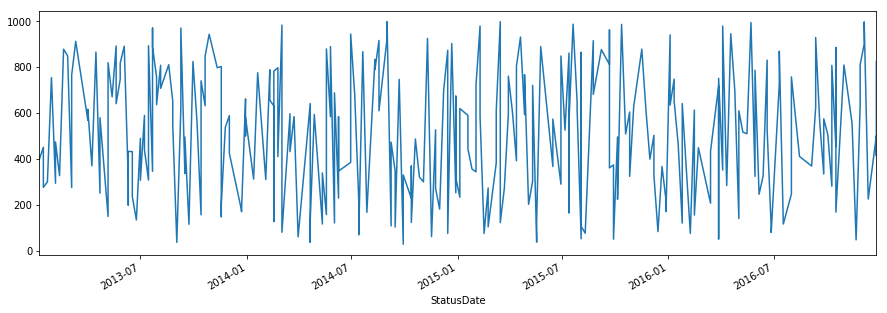

In [169]:
df['CustomerCount'].plot(figsize=(15,5))
plt.show();

If we take a look at the data, we begin to realize that there are multiple values for the same location, StatusDate, and Status combination. It is possible that this means the data you are working with is dirty/bad/inaccurate, but we will assume otherwise. We can assume this data set is a subset of a bigger data set and if we simply add the values in the ***CustomerCount*** column per location, StatusDate, and Status we will get the ***Total Customer Count*** per day.  

In [171]:
sortdf = df[df['location']=='Bangsar'].sort_index(axis=0)
sortdf.head(10)

,location,Status,CustomerCount
StatusDate,,,
2013-01-07,Bangsar,1,398
2013-01-14,Bangsar,1,276
2013-03-04,Bangsar,1,766
2013-04-01,Bangsar,1,568
2013-04-22,Bangsar,1,580
2013-05-20,Bangsar,1,893
2013-05-27,Bangsar,1,747
2013-06-17,Bangsar,1,235
2013-07-15,Bangsar,1,894


### Groupby
Our task is now to create a new dataframe that compresses the data so we have daily customer counts per location and StatusDate. We can ignore the Status column since all the values in this column are of value *1*. To accomplish this we will use the dataframe's functions ***groupby*** and ***sum()***.  

Note that we are using **reset_index** . If we did not, we would not have been able to group by both the location and the StatusDate since the groupby function expects only columns as inputs. The **reset_index** function will bring the index ***StatusDate*** back to a column in the dataframe. 

In [172]:
# Group by State and StatusDate
Daily = df.reset_index().groupby(['location','StatusDate']).sum()
Daily.head(20)

Status  CustomerCount
location StatusDate                       
Ampang   2013-01-21       1            300
         2013-03-04       1            275
         2013-04-01       1            617
         2013-04-15       1            866
         2013-05-20       1            641
         2013-06-03       1            892
         2013-06-17       1            432
         2013-07-08       3           1475
         2013-07-22       2           1235
         2013-09-02       1             36
         2013-09-09       1            971
         2013-09-16       2            831
         2013-10-07       1            562
         2013-10-21       1            632
         2013-11-25       1            538
         2013-12-02       2           1013
         2013-12-23       1            176
         2013-12-30       2           1163
         2014-01-20       1            776
         2014-03-17       2           1029

The ***location*** and ***StatusDate*** columns are automatically placed in the index of the ***Daily*** dataframe. You can think of the ***index*** as the primary key of a database table but without the constraint of having unique values. Columns in the index as you will see allow us to easily select, plot, and perform calculations on the data.  

Below we delete the ***Status*** column since it is all equal to one and no longer necessary.

In [173]:
del Daily['Status']
Daily.head()

CustomerCount
location StatusDate               
Ampang   2013-01-21            300
         2013-03-04            275
         2013-04-01            617
         2013-04-15            866
         2013-05-20            641

In [174]:
# Try another groupby!

## MultiIndex

In [176]:
# What is the index of the Daily dataframe
Daily.index

MultiIndex(levels=[['Ampang', 'Bangsar', 'Cheras', 'Petaling Jaya'], [2013-01-07 00:00:00, 2013-01-14 00:00:00, 2013-01-21 00:00:00, 2013-01-28 00:00:00, 2013-02-04 00:00:00, 2013-02-11 00:00:00, 2013-02-18 00:00:00, 2013-02-25 00:00:00, 2013-03-04 00:00:00, 2013-03-11 00:00:00, 2013-04-01 00:00:00, 2013-04-08 00:00:00, 2013-04-15 00:00:00, 2013-04-22 00:00:00, 2013-05-06 00:00:00, 2013-05-13 00:00:00, 2013-05-20 00:00:00, 2013-05-27 00:00:00, 2013-06-03 00:00:00, 2013-06-10 00:00:00, 2013-06-17 00:00:00, 2013-06-24 00:00:00, 2013-07-01 00:00:00, 2013-07-08 00:00:00, 2013-07-15 00:00:00, 2013-07-22 00:00:00, 2013-07-29 00:00:00, 2013-08-05 00:00:00, 2013-08-19 00:00:00, 2013-08-26 00:00:00, 2013-09-02 00:00:00, 2013-09-09 00:00:00, 2013-09-16 00:00:00, 2013-09-23 00:00:00, 2013-09-30 00:00:00, 2013-10-07 00:00:00, 2013-10-14 00:00:00, 2013-10-21 00:00:00, 2013-10-28 00:00:00, 2013-11-11 00:00:00, 2013-11-18 00:00:00, 2013-11-25 00:00:00, 2013-12-02 00:00:00, 2013-12-23 00:00:00, 2013-1

In [177]:
# Select the location index
Daily.index.levels[0]

Index(['Ampang', 'Bangsar', 'Cheras', 'Petaling Jaya'], dtype='object', name='location')

In [178]:
Daily.index.levels[1]

DatetimeIndex(['2013-01-07', '2013-01-14', '2013-01-21', '2013-01-28',
               '2013-02-04', '2013-02-11', '2013-02-18', '2013-02-25',
               '2013-03-04', '2013-03-11',
               ...
               '2016-10-03', '2016-10-10', '2016-10-17', '2016-10-31',
               '2016-11-14', '2016-11-21', '2016-11-28', '2016-12-05',
               '2016-12-12', '2016-12-26'],
              dtype='datetime64[ns]', name='StatusDate', length=170, freq=None)

In [179]:
# Try unstacking with 0 and 1.
Daily.unstack(0).head()

CustomerCount                             
location          Ampang Bangsar Cheras Petaling Jaya
StatusDate                                           
2013-01-07           NaN   398.0    NaN           NaN
2013-01-14           NaN   276.0  451.0           NaN
2013-01-21         300.0     NaN    NaN           NaN
2013-01-28           NaN     NaN  755.0           NaN
2013-02-04           NaN     NaN  294.0         474.0

### Pivot Tables


Are easy! and are akin to Excel.

In [181]:
# Let's Create the data set again.
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['location','Status','CustomerCount','StatusDate'])
df.head(5)

,location,Status,CustomerCount,StatusDate
0,Ampang,3,392,2013-01-07
1,Cheras,1,37,2013-01-14
2,Bangsar,3,245,2013-01-21
3,Bangsar,2,299,2013-01-28
4,Petaling Jaya,1,663,2013-02-04


In [182]:
pd.pivot_table(df, values = 'CustomerCount', 
               index = ['StatusDate','Status'],
               columns = ['location']).head()

location           Ampang  Bangsar  Cheras  Petaling Jaya
StatusDate Status                                        
2013-01-07 1          NaN      NaN    51.0            NaN
           2          NaN      NaN   118.0          515.0
           3        392.0      NaN     NaN            NaN
2013-01-14 1          NaN      NaN    37.0            NaN
           3        111.0      NaN   742.0          112.0

In [183]:
pd.pivot_table(df, values = 'CustomerCount', 
               index = ['StatusDate','location'],
               columns = ['Status']).head()

Status                       1      2      3
StatusDate location                         
2013-01-07 Ampang          NaN    NaN  392.0
           Cheras         51.0  118.0    NaN
           Petaling Jaya   NaN  515.0    NaN
2013-01-14 Ampang          NaN    NaN  111.0
           Cheras         37.0    NaN  742.0

In [185]:
Daily

CustomerCount
location      StatusDate               
Ampang        2013-01-21            300
              2013-03-04            275
              2013-04-01            617
              2013-04-15            866
              2013-05-20            641
              2013-06-03            892
              2013-06-17            432
              2013-07-08           1475
              2013-07-22           1235
              2013-09-02             36
              2013-09-09            971
              2013-09-16            831
              2013-10-07            562
              2013-10-21            632
              2013-11-25            538
              2013-12-02           1013
              2013-12-23            176
              2013-12-30           1163
              2014-01-20            776
              2014-03-17           1029
              2014-04-21             36
              2014-06-02            688
              2014-06-30            945
              2014-07-07            681
              2014-08-11            790
              2014-09-15            451
              2014-09-29            330
              2014-10-27            321
              2014-11-24            527
              2014-12-08            700
...                                 ...
Petaling Jaya 2015-06-15            574
              2015-06-29            290
              2015-07-06            526
              2015-07-13            862
              2015-07-20            988
              2015-09-21            361
              2015-09-28            374
              2015-10-05            496
              2015-10-19            509
              2015-10-26            452
              2015-12-21            367
              2015-12-28            388
              2016-01-04           1576
              2016-01-11            652
              2016-01-18            464
              2016-02-15            613
              2016-03-14            434
              2016-03-28            285
              2016-05-02            140
              2016-05-23            995
              2016-05-30            324
              2016-07-11            870
              2016-07-18            116
              2016-09-12            624
              2016-10-17            454
              2016-11-14            556
              2016-11-21             47
              2016-11-28            812
              2016-12-12            225
              2016-12-26            915

[254 rows x 1 columns]

## Example Analysis

Ampang


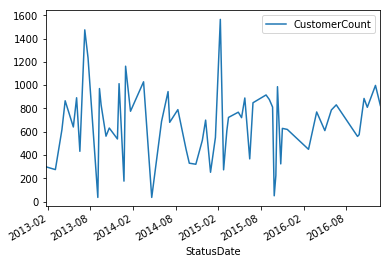

Bangsar


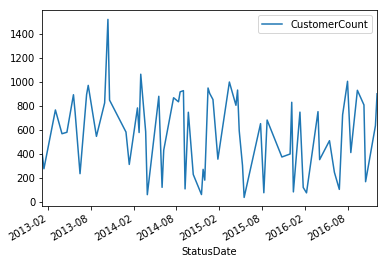

Cheras


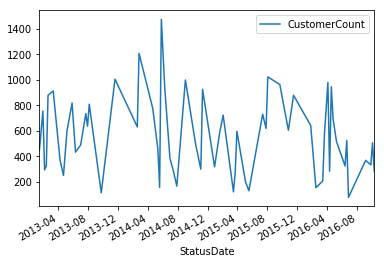

Petaling Jaya


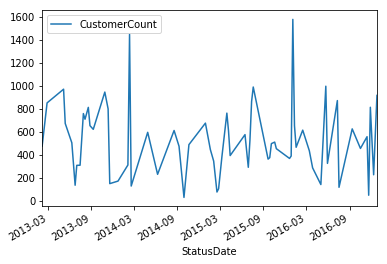

In [184]:
for place in Daily.index.levels[0]:
    print(place)
    Daily.loc[place].plot()
    plt.show();

Lets now plot the data per location.  

As you can see by breaking the graph up by the ***location*** column we have a much clearer picture on how the data looks like. Can you spot any outliers?

We will assume that per month the customer count should remain relatively steady. Any data outside a specific range in that month will be removed from the data set. The final result should have smooth graphs with no spikes.  

***LocationYearMonth*** - Here we group by location, Year of StatusDate, and Month of StatusDate.  
***Daily['Outlier']*** - A boolean (True or False) value letting us know if the value in the CustomerCount column is ouside the acceptable range.  

We will be using the attribute ***transform*** instead of ***apply***. The reason is that transform will keep the shape(# of rows and columns) of the dataframe the same and apply will not. By looking at the previous graphs, we can realize they are not resembling a gaussian distribution, this means we cannot use summary statistics like the mean and stDev. We use percentiles instead. Note that we run the risk of eliminating good data.

In [187]:
# Calculate Outliers
LocationYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = LocationYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = LocationYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper']) 

# Remove Outliers
Daily = Daily[Daily['Outlier'] == False]

The dataframe named ***Daily*** will hold customer counts that have been aggregated per day. The original data (df) has multiple records per day.  We are left with a data set that is indexed by both the state and the StatusDate. The Outlier column should be equal to ***False*** signifying that the record is not an outlier.

In [188]:
Daily.head()

CustomerCount    Lower     Upper  Outlier
location StatusDate                                           
Ampang   2013-01-21            300  150.000   450.000    False
         2013-03-04            275  137.500   412.500    False
         2013-04-01            617  152.875  1330.125    False
         2013-04-15            866  152.875  1330.125    False
         2013-05-20            641  320.500   961.500    False

We create a separate dataframe named ***ALL*** which groups the Daily dataframe by StatusDate. We are essentially getting rid of the ***Location*** column. The ***Max*** column represents the maximum customer count per month. The ***Max*** column is used to smooth out the graph.

In [189]:
# Combine all markets

# Get the max customer count by Date
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount'] # rename column

# Group by Year and Month
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

# What is the max customer count per Year and Month
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

,CustomerCount,Max
StatusDate,,
2013-01-07,398,755
2013-01-14,727,755
2013-01-21,300,755
2013-01-28,755,755
2013-02-04,768,879


As you can see from the ***ALL*** dataframe above, in the month of Jan 2013, the maximum customer count was 1702. If we had used ***apply***, we would have got a dataframe with (Year and Month) as the index and just the *Max* column with the value of 1702. 


----------------------------------  
There is also an interest to gauge if the current customer counts were reaching certain goals the company had established. The task here is to visually show if the current customer counts are meeting the goals listed below. We will call the goals ***BHAG*** (Big Hairy Annual Goal).  

* 12/31/2015 - 1,000 customers  
* 12/31/2016 - 2,000 customers  
* 12/31/2017 - 3,000 customers  

We will be using the **date_range** function to create our dates.  

***Definition:*** date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None)  
***Docstring:*** Return a fixed frequency datetime index, with day (calendar) as the default frequency  

By choosing the frequency to be ***A*** or annual we will be able to get the three target dates from above.

In [190]:
pd.date_range?

# Presenting Data  

Create individual Graphs for each location

In [192]:
df['location'].unique()

array(['Ampang', 'Cheras', 'Bangsar', 'Petaling Jaya'], dtype=object)

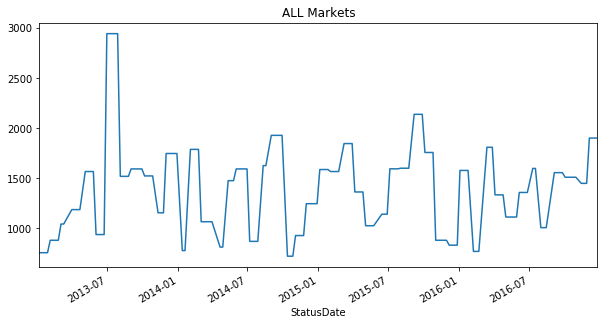

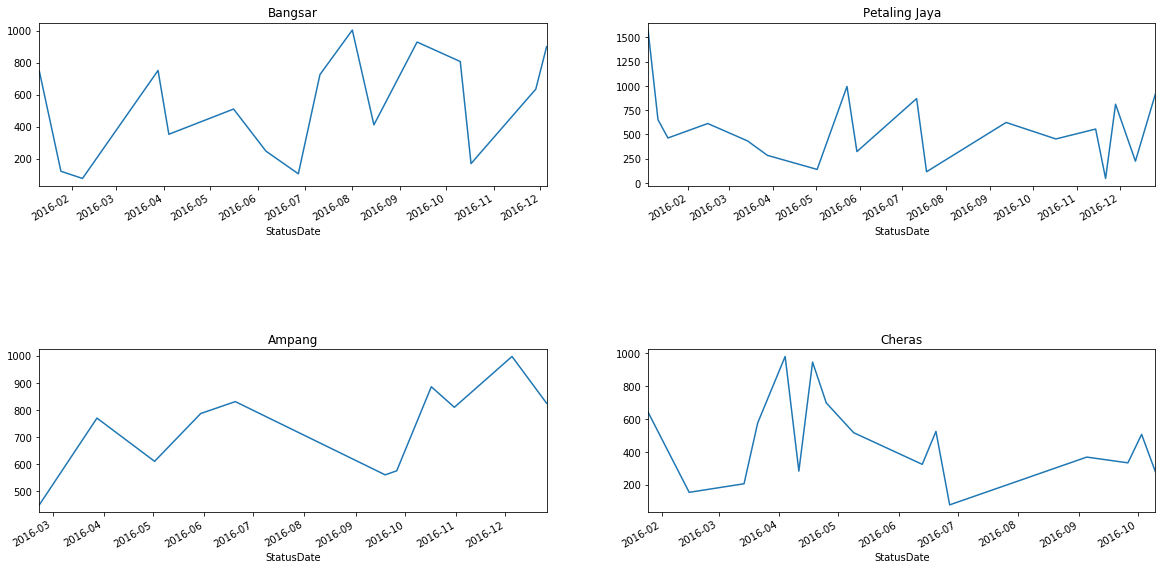

In [193]:

# First Graph
ALL['Max'].plot(figsize=(10, 5));plt.title('ALL Markets')

# Last four Graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots

Daily.loc['Bangsar']['CustomerCount']['2016':].fillna(method='pad').plot(ax=axes[0,0])
Daily.loc['Petaling Jaya']['CustomerCount']['2016':].fillna(method='pad').plot(ax=axes[0,1]) 
Daily.loc['Ampang']['CustomerCount']['2016':].fillna(method='pad').plot(ax=axes[1,0]) 
Daily.loc['Cheras']['CustomerCount']['2016':].fillna(method='pad').plot(ax=axes[1,1]) 



# Add titles
axes[0,0].set_title('Bangsar')
axes[0,1].set_title('Petaling Jaya')
axes[1,0].set_title('Ampang')
axes[1,1].set_title('Cheras')
plt.show();

## Summary

Pandas provides a "batteries-included" basic data analysis:
  - **Loading data:** `read_csv`, `read_table`, `read_sql`, and `read_html`
  - **Selection, filtering, and aggregation** (i.e., SQL-type operations): There's a special syntax for `SELECT`ing.  There's the `merge` method for `JOIN`ing.  There's also an easy syntax for what in SQL is a mouthful: Creating a new column whose value is computed from other column -- with the bonus that now the computations can use the full power of Python (though it might be faster if it didn't).
  - **"Pivot table" style aggregation**: If you're an Excel cognosceti, you may appreciate this.
  - **NA handling**: Like R's data frames, there is good support for transforming NA values with default values / averaging tricks / etc.
  - **Basic statistics:** e.g. `mean`, `median`, `max`, `min`, and the convenient `describe`.
  - **Plugging into more advanced analytics:** Okay, this isn't batteries included.  But still, it plays reasonably with `sklearn`.
  - **Visualization:** For instance `plot` and `hist`.
  
Plugging into more advanced analytics
-------
Almost any "advanced analytics" tool in the Python ecosystem is going to take as input `np.array` type arrays.  You can access the underlying array of a data frame column as

        df['column'].values
        
Many of them take `nd.array` whose underlying data can be accessed by 

        df.values
        
directly.  *Most* of the time, they will take `df['column']` and `df` without needing to look at values.

This is particularly important if you want to use Pandas with the sklearn library. See this [blog post](http://www.markhneedham.com/blog/2013/11/09/python-making-scikit-learn-and-pandas-play-nice/) for an example.